Prepare data matrix che funziona

In [ ]:
def prepare_data_matrix(dataset):
    """
    Converts xarray dataset to 2D matrix
    
    Parameters:
    -----------
    dataset : xarray.Dataset
        Input dataset with meteorological variables
        
    Returns:
    --------
    combined_matrix : numpy.ndarray
        2D matrix with shape (time, features)
    data_matrices : dict
        Dictionary containing matrices for each variable
    """
    data_matrices = {}
    
    for var in dataset.data_vars:
        print(f"   • Processing {var}...")
        var_data = dataset[var]
        
        # Reorganize dimensions: (time, features)
        if 'time' in var_data.dims:
            # Stack all non-temporal dimensions
            spatial_dims = [dim for dim in var_data.dims if dim != 'time']
            if spatial_dims:
                stacked = var_data.stack(features=spatial_dims)      # From: var[time=1827, pressure=3, lat=201, lon=321]
                matrix = stacked.values  # shape: (time, features)   # To:  var[time=1827, features=193563]  (3×201×321=193563)
            else:
                matrix = var_data.values.reshape(-1, 1)  # For variables without spatial dimensions
        else:
            matrix = var_data.values.flatten().reshape(1, -1)
        
        data_matrices[var] = matrix
    
    # Concatenate all variables
    all_matrices = list(data_matrices.values())
    combined_matrix = np.concatenate(all_matrices, axis=1) # concatenate along the columns (horizontally)

    return combined_matrix, data_matrices

______________________________________

### Per vedere come ho standardizzato i dati, plotta la gaussiana prima e dopo


In [ ]:
# ⚠️DA TOGLIERE. IMPORTANTE: ESEGUI QUESTA CELLA PRIMA DELLA STANDARDIZZAZIONE!
# SALVATAGGIO DISTRIBUZIONE PRE-STANDARDIZZAZIONE
# Esegui PRIMA della standardizzazione per confronto

print("DISTRIBUZIONE PRE-STANDARDIZZAZIONE")


# Selezione 3 features strategiche per analisi
# Feature 1: Prima feature (z a 850hPa, primo punto spaziale)
# Feature 2: Feature centrale (circa metà dataset)  
# Feature 3: Ultima feature (v a 250hPa, ultimo punto spaziale)

n_features = X.shape[1]
selected_features = [
    0,                    # Prima feature (z_850hPa_primo_punto)
    n_features // 2,      # Feature centrale (circa u_500hPa_punto_medio)
    n_features - 1        # Ultima feature (v_250hPa_ultimo_punto)
]

feature_names = [
    "z_850hPa_first_point",
    "z_500hPa_middle_point",
    "z_250hPa_last_point"
]

print(f"   • Features selezionate: {selected_features}")
print(f"   • Nomi: {feature_names}")

# Salva distribuzione originale (memory-safe: solo 3 colonne)
original_distributions = {}

for i, (feat_idx, feat_name) in enumerate(zip(selected_features, feature_names)):
    feat_data = X[:, feat_idx].copy()  # Solo una colonna alla volta
    
    original_distributions[feat_name] = {
        'data': feat_data,
        'mean': np.mean(feat_data),
        'std': np.std(feat_data),
        'min': np.min(feat_data),
        'max': np.max(feat_data)
    }
    
    print(f"   • {feat_name}:")
    print(f"     └─ Mean: {original_distributions[feat_name]['mean']:.3f}")
    print(f"     └─ Std:  {original_distributions[feat_name]['std']:.3f}")
    print(f"     └─ Range: [{original_distributions[feat_name]['min']:.3f}, {original_distributions[feat_name]['max']:.3f}]")

print(f"   • Memoria usata per backup: {len(selected_features) * X.shape[0] * 8 / 1024 / 1024:.2f} MB")
print("   • Distribuzione originale salvata!")

DISTRIBUZIONE PRE-STANDARDIZZAZIONE
   • Features selezionate: [0, 96781, 193562]
   • Nomi: ['z_850hPa_first_point', 'z_500hPa_middle_point', 'z_250hPa_last_point']
   • z_850hPa_first_point:
     └─ Mean: 13625.073
     └─ Std:  1017.982
     └─ Range: [9610.352, 16016.871]
   • z_500hPa_middle_point:
     └─ Mean: 55532.785
     └─ Std:  1317.211
     └─ Range: [51075.641, 58331.695]
   • z_250hPa_last_point:
     └─ Mean: 107022.641
     └─ Std:  677.500
     └─ Range: [104486.062, 108333.812]
   • Memoria usata per backup: 0.04 MB
   • Distribuzione originale salvata!


In [ ]:
# ⚠️DA TOGLIERE. IMPORTANTE: ESEGUI QUESTA CELLA PRIMA DELLA STANDARDIZZAZIONE!
# SALVATAGGIO DISTRIBUZIONE PRE-STANDARDIZZAZIONE
# Esegui PRIMA della standardizzazione per confronto

print("DISTRIBUZIONE PRE-STANDARDIZZAZIONE")


# Selezione 3 features strategiche per analisi
# Feature 1: Prima feature (z a 850hPa, primo punto spaziale)
# Feature 2: Feature centrale (circa metà dataset)  
# Feature 3: Ultima feature (v a 250hPa, ultimo punto spaziale)

n_features = X.shape[1]
selected_features = [
    0,                    # Prima feature (z_850hPa_primo_punto)
    n_features // 2,      # Feature centrale (circa u_500hPa_punto_medio)
    n_features - 1        # Ultima feature (v_250hPa_ultimo_punto)
]

feature_names = [
    "z_850hPa_primo_punto",
    f"feature_centrale_{selected_features[1]}",
    "v_250hPa_ultimo_punto"
]

print(f"   • Features selezionate: {selected_features}")
print(f"   • Nomi: {feature_names}")

# Salva distribuzione originale (memory-safe: solo 3 colonne)
original_distributions = {}

for i, (feat_idx, feat_name) in enumerate(zip(selected_features, feature_names)):
    feat_data = X[:, feat_idx].copy()  # Solo una colonna alla volta
    
    original_distributions[feat_name] = {
        'data': feat_data,
        'mean': np.mean(feat_data),
        'std': np.std(feat_data),
        'min': np.min(feat_data),
        'max': np.max(feat_data)
    }
    
    print(f"   • {feat_name}:")
    print(f"     └─ Mean: {original_distributions[feat_name]['mean']:.3f}")
    print(f"     └─ Std:  {original_distributions[feat_name]['std']:.3f}")
    print(f"     └─ Range: [{original_distributions[feat_name]['min']:.3f}, {original_distributions[feat_name]['max']:.3f}]")

print(f"   • Memoria usata per backup: {len(selected_features) * X.shape[0] * 8 / 1024 / 1024:.2f} MB")
print("   • Distribuzione originale salvata!")

DISTRIBUZIONE PRE-STANDARDIZZAZIONE
   • Features selezionate: [0, 387126, 774251]
   • Nomi: ['z_850hPa_primo_punto', 'feature_centrale_387126', 'v_250hPa_ultimo_punto']
   • z_850hPa_primo_punto:
     └─ Mean: 13625.073
     └─ Std:  1017.982
     └─ Range: [9610.352, 16016.871]
   • feature_centrale_387126:
     └─ Mean: -2.788
     └─ Std:  4.013
     └─ Range: [-19.175, 14.705]
   • v_250hPa_ultimo_punto:
     └─ Mean: 1.633
     └─ Std:  8.515
     └─ Range: [-45.567, 36.314]
   • Memoria usata per backup: 0.04 MB
   • Distribuzione originale salvata!


In [ ]:
#DA TOGLIERE
# CONFRONTO DISTRIBUZIONI: PRIMA vs DOPO STANDARDIZZAZIONE
# Esegui DOPO aver completato la standardizzazione

print("CONFRONTO DISTRIBUZIONI: PRE vs POST STANDARDIZZAZIONE")


# Verifica che la standardizzazione sia stata completata
if 'original_distributions' not in globals():
    print("❌ ERRORE: Esegui prima la cella di salvataggio pre-standardizzazione!")
else:
    print("✅ Dati originali trovati, procedendo con il confronto...")
    
    # Crea subplot per confronto
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle('Confronto Distribuzioni: Prima vs Dopo Standardizzazione', fontsize=16)
    
    for i, (feat_idx, feat_name) in enumerate(zip(selected_features, feature_names)):
        # Dati originali (salvati)
        original_data = original_distributions[feat_name]['data']
        
        # Dati standardizzati (attuali)
        standardized_data = X[:, feat_idx]
        
        # Plot distribuzione originale
        axes[i, 0].hist(original_data, bins=50, alpha=0.7, color='blue', 
                       density=True, edgecolor='black', linewidth=0.5)
        axes[i, 0].set_title(f'{feat_name}\nOriginale')
        axes[i, 0].set_xlabel('Valore')
        axes[i, 0].set_ylabel('Densità')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Aggiungi statistiche originali
        orig_mean = original_distributions[feat_name]['mean']
        orig_std = original_distributions[feat_name]['std']
        axes[i, 0].axvline(orig_mean, color='red', linestyle='--', 
                          label=f'μ={orig_mean:.2f}')
        axes[i, 0].axvline(orig_mean + orig_std, color='orange', linestyle=':', 
                          label=f'σ={orig_std:.2f}')
        axes[i, 0].axvline(orig_mean - orig_std, color='orange', linestyle=':')
        axes[i, 0].legend()
        
        # Plot distribuzione standardizzata
        axes[i, 1].hist(standardized_data, bins=50, alpha=0.7, color='green',
                       density=True, edgecolor='black', linewidth=0.5)
        axes[i, 1].set_title(f'{feat_name}\nStandardizzata')
        axes[i, 1].set_xlabel('Valore Standardizzato')
        axes[i, 1].set_ylabel('Densità')
        axes[i, 1].grid(True, alpha=0.3)
        
        # Aggiungi statistiche standardizzate
        std_mean = np.mean(standardized_data)
        std_std = np.std(standardized_data)
        axes[i, 1].axvline(std_mean, color='red', linestyle='--', 
                          label=f'μ={std_mean:.3f}')
        axes[i, 1].axvline(std_mean + std_std, color='orange', linestyle=':', 
                          label=f'σ={std_std:.3f}')
        axes[i, 1].axvline(std_mean - std_std, color='orange', linestyle=':')
        axes[i, 1].legend()
        
        # Stampa statistiche di confronto
        print(f"\n📊 {feat_name.upper()}:")
        print(f"   ORIGINALE → Mean: {orig_mean:8.3f}, Std: {orig_std:8.3f}")
        print(f"   STANDARD  → Mean: {std_mean:8.3f}, Std: {std_std:8.3f}")
        print(f"   CAMBIO    → Mean: {std_mean-orig_mean:8.3f}, Std: {std_std-orig_std:8.3f}")
    
    plt.tight_layout()
    plt.show()
    
    # Verifica teorica standardizzazione
    print(f"\n✅ VERIFICA STANDARDIZZAZIONE:")
    print(f"   • Tutte le medie dovrebbero essere ≈ 0")
    print(f"   • Tutte le std dovrebbero essere ≈ 1")
    print(f"   • Le distribuzioni dovrebbero mantenere la forma originale")
    
    # Cleanup memoria
    print(f"\n🧹 Pulizia memoria delle distribuzioni originali...")
    del original_distributions
    import gc
    gc.collect()
    print(f"   • Backup distribuzioni originali rimosso dalla memoria")

CONFRONTO DISTRIBUZIONI: PRE vs POST STANDARDIZZAZIONE
✅ Dati originali trovati, procedendo con il confronto...

📊 Z_850HPA_FIRST_POINT:
   ORIGINAL→ Mean: 13625.073, Std: 1017.982
   STANDARD  → Mean:   -1.213, Std:    0.028
   CHANGE   → Mean: -13626.286, Std: -1017.953

📊 Z_500HPA_MIDDLE_POINT:
   ORIGINAL→ Mean: 55532.785, Std: 1317.211
   STANDARD  → Mean:   -0.052, Std:    0.036
   CHANGE   → Mean: -55532.836, Std: -1317.175

📊 Z_250HPA_LAST_POINT:
   ORIGINAL→ Mean: 107022.641, Std:  677.500
   STANDARD  → Mean:    1.375, Std:    0.019
   CHANGE   → Mean: -107021.266, Std: -677.482


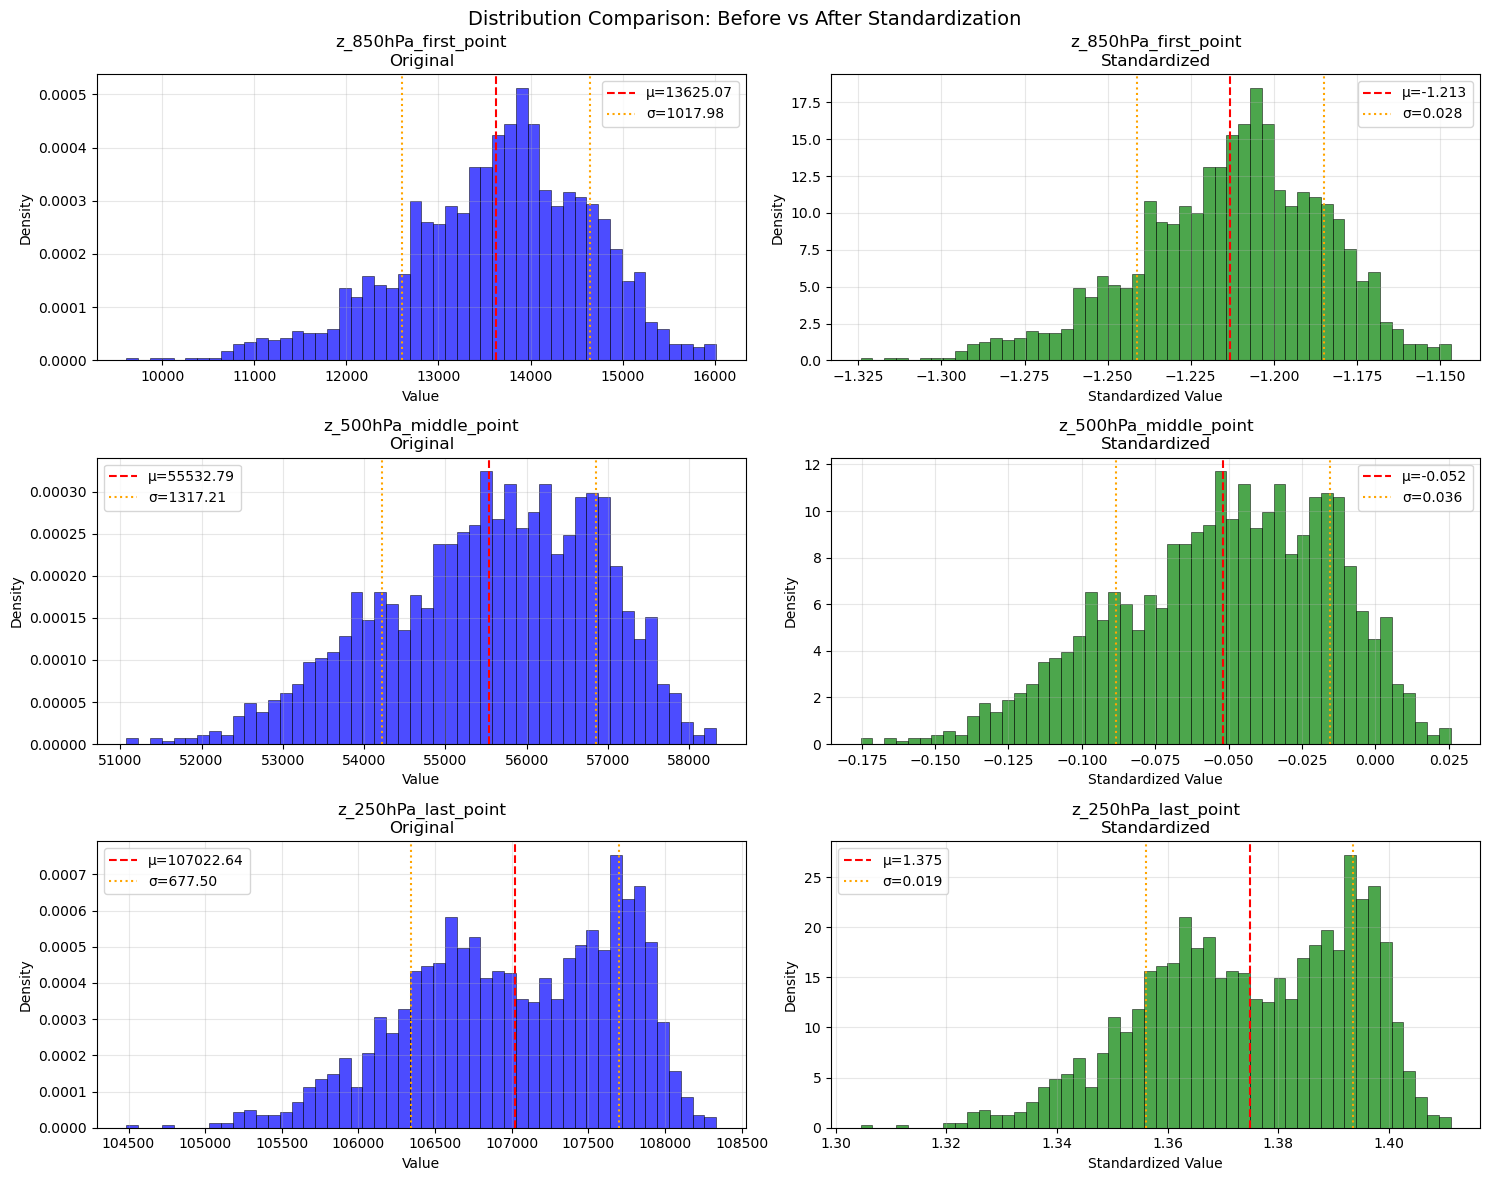


✅ VERIFICA STANDARDIZZAZIONE:
   • Tutte le medie dovrebbero essere ≈ 0
   • Tutte le std dovrebbero essere ≈ 1
   • Le distribuzioni dovrebbero mantenere la forma originale

🧹 Pulizia memoria delle distribuzioni originali...
   • Backup distribuzioni originali rimosso dalla memoria


In [ ]:
#DA TOGLIERE
# CONFRONTO DISTRIBUZIONI: PRIMA vs DOPO STANDARDIZZAZIONE
# Esegui DOPO aver completato la standardizzazione

print("CONFRONTO DISTRIBUZIONI: PRE vs POST STANDARDIZZAZIONE")


# Verifica che la standardizzazione sia stata completata
if 'original_distributions' not in globals():
    print("❌ ERRORE: Esegui prima la cella di salvataggio pre-standardizzazione!")
else:
    print("✅ Dati originali trovati, procedendo con il confronto...")
    
    # Crea subplot per confronto
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle('Distribution Comparison: Before vs After Standardization', fontsize=14)

    for i, (feat_idx, feat_name) in enumerate(zip(selected_features, feature_names)):
        # Dati originali (salvati)
        original_data = original_distributions[feat_name]['data']
        
        # Dati standardizzati (attuali)
        standardized_data = X[:, feat_idx]
        
        # Plot distribuzione originale
        axes[i, 0].hist(original_data, bins=50, alpha=0.7, color='blue', 
                       density=True, edgecolor='black', linewidth=0.5)
        axes[i, 0].set_title(f'{feat_name}\nOriginal')
        axes[i, 0].set_xlabel('Value')
        axes[i, 0].set_ylabel('Density')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Aggiungi statistiche originali
        orig_mean = original_distributions[feat_name]['mean']
        orig_std = original_distributions[feat_name]['std']
        axes[i, 0].axvline(orig_mean, color='red', linestyle='--', 
                          label=f'μ={orig_mean:.2f}')
        axes[i, 0].axvline(orig_mean + orig_std, color='orange', linestyle=':', 
                          label=f'σ={orig_std:.2f}')
        axes[i, 0].axvline(orig_mean - orig_std, color='orange', linestyle=':')
        axes[i, 0].legend()
        
        # Plot distribuzione standardizzata
        axes[i, 1].hist(standardized_data, bins=50, alpha=0.7, color='green',
                       density=True, edgecolor='black', linewidth=0.5)
        axes[i, 1].set_title(f'{feat_name}\nStandardized')
        axes[i, 1].set_xlabel('Standardized Value')
        axes[i, 1].set_ylabel('Density')
        axes[i, 1].grid(True, alpha=0.3)
        
        # Aggiungi statistiche standardizzate
        std_mean = np.mean(standardized_data)
        std_std = np.std(standardized_data)
        axes[i, 1].axvline(std_mean, color='red', linestyle='--', 
                          label=f'μ={std_mean:.3f}')
        axes[i, 1].axvline(std_mean + std_std, color='orange', linestyle=':', 
                          label=f'σ={std_std:.3f}')
        axes[i, 1].axvline(std_mean - std_std, color='orange', linestyle=':')
        axes[i, 1].legend()
        
        # Stampa statistiche di confronto
        print(f"\n📊 {feat_name.upper()}:")
        print(f"   ORIGINAL→ Mean: {orig_mean:8.3f}, Std: {orig_std:8.3f}")
        print(f"   STANDARD  → Mean: {std_mean:8.3f}, Std: {std_std:8.3f}")
        print(f"   CHANGE   → Mean: {std_mean-orig_mean:8.3f}, Std: {std_std-orig_std:8.3f}")
    
    plt.tight_layout()
    plt.show()
    
    # Verifica teorica standardizzazione
    print(f"\n✅ VERIFICA STANDARDIZZAZIONE:")
    print(f"   • Tutte le medie dovrebbero essere ≈ 0")
    print(f"   • Tutte le std dovrebbero essere ≈ 1")
    print(f"   • Le distribuzioni dovrebbero mantenere la forma originale")
    
    # Cleanup memoria
    print(f"\n🧹 Pulizia memoria delle distribuzioni originali...")
    del original_distributions
    import gc
    gc.collect()
    print(f"   • Backup distribuzioni originali rimosso dalla memoria")

![Esempio Standardizzazione](./standardization_example.png)

______________

### 2 Plots per plottare i coefficienti e i veri valori della pca
da mettere dopo il grafico 3d

In [ ]:
print("VISUALIZZAZIONE DELLA PRIME COMPONENTI PRINCIPALI")

components_to_plot = [
    (ipca.components_[0], "PC1", "First principal component (PC1)"),
    (ipca.components_[1], "PC2", "Second principal component (PC2)"),
    (ipca.components_[2], "PC3", "Third principal component (PC3)"),
    (ipca.components_[3], "PC4", "Fourth principal component (PC4)"),
    (ipca.components_[4], "PC5", "Fifth principal component (PC5)")
]

# Get dimensions from original dataset (ds), not from X_pca which is a numpy array
n_lat = ds.dims['latitude'] if 'latitude' in ds.dims else len(ds.latitude)
n_lon = ds.dims['longitude'] if 'longitude' in ds.dims else len(ds.longitude)
n_pressure = ds.dims['isobaricInhPa'] if 'isobaricInhPa' in ds.dims else len(ds.isobaricInhPa)

lats = ds.latitude.values
lons = ds.longitude.values
pressure_levels = ds.isobaricInhPa.values.tolist()


visualization_pca_coefficient(components_to_plot, pressure_levels, lats, lons, n_pressure, n_lat, n_lon, sf=sf)

# Statistiche comparative per tutte le componenti
print(f"\n   • STATISTICHE COMPARATIVE PER LIVELLO DI PRESSIONE:")
print(f"   • {'Pressure':<10} {'PC1 Min':<12} {'PC1 Max':<12} {'PC2 Min':<12} {'PC2 Max':<12} {'PC3 Min':<12} {'PC3 Max':<12}")
print(f"   • {'-'*84}")

# Ricostruisci tutte le componenti per le statistiche
pc1_reshaped = components_to_plot[0][0].reshape(n_pressure, n_lat, n_lon)
pc2_reshaped = components_to_plot[1][0].reshape(n_pressure, n_lat, n_lon)
pc3_reshaped = components_to_plot[2][0].reshape(n_pressure, n_lat, n_lon)

for i, pressure in enumerate(pressure_levels):
    pc1_level = pc1_reshaped[i, :, :]
    pc2_level = pc2_reshaped[i, :, :]
    pc3_level = pc3_reshaped[i, :, :]
    
    print(f"   • {pressure:<10} {pc1_level.min():<12.6f} {pc1_level.max():<12.6f} "
          f"{pc2_level.min():<12.6f} {pc2_level.max():<12.6f} "
          f"{pc3_level.min():<12.6f} {pc3_level.max():<12.6f}")

VISUALIZZAZIONE DELLA PRIME COMPONENTI PRINCIPALI


ValueError: cannot reshape array of size 129042 into shape (3,201,321)

The previous plots show the spatial distribution of the PCA coefficients (the values in the array ipca.components_). These coefficients are abstract and cannot be interpreted physically; they represent the mathematical “weight” that each geographical point has in the principal component. Red indicates a positive coefficient, while blue indicates a negative one. The color intensity reflects how strongly that point contributes to the principal component. In other words, the plots highlight where the component is geographically “more active.”

To understand what each principal component actually represents, we then plot the real atmospheric pattern associated with each principal component.

ricostruire il pattern meteorologico fisico che ogni componente principale rappresenta.


=== First principal component (PC1) ===
Range physic pattern PC1: [-138.8, 2636.8]m
Scala comune per PC1: [-2637, 2637]m


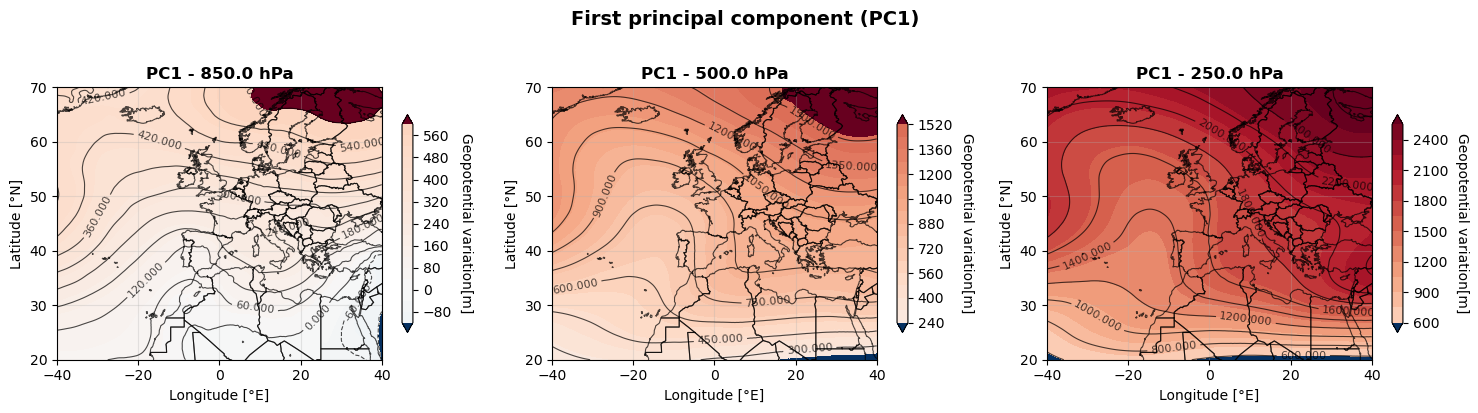

 PC1 statistics:
  850.0 hPa: range [-138.810033, 633.431933]
  500.0 hPa: range [187.622412, 1583.904167]
  250.0 hPa: range [526.525939, 2636.784345]

=== Second principal component (PC2) ===
Range physic pattern PC2: [-1023.5, 1771.3]m
Scala comune per PC2: [-1771, 1771]m


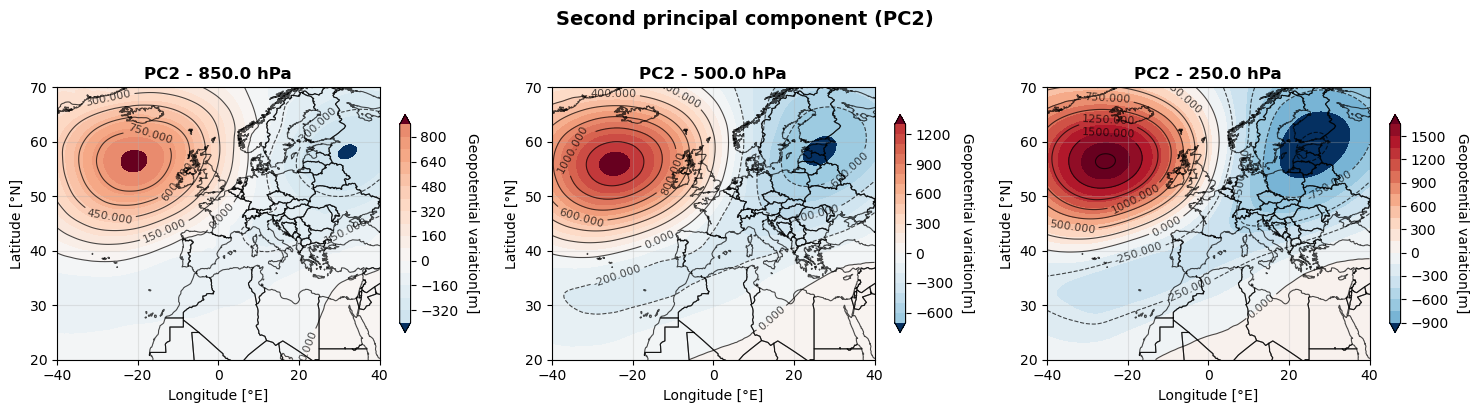

 PC2 statistics:
  850.0 hPa: range [-404.245648, 899.319891]
  500.0 hPa: range [-720.437668, 1339.705835]
  250.0 hPa: range [-1023.508054, 1771.309656]

=== Third principal component (PC3) ===
Range physic pattern PC3: [-937.5, 1383.2]m
Scala comune per PC3: [-1383, 1383]m


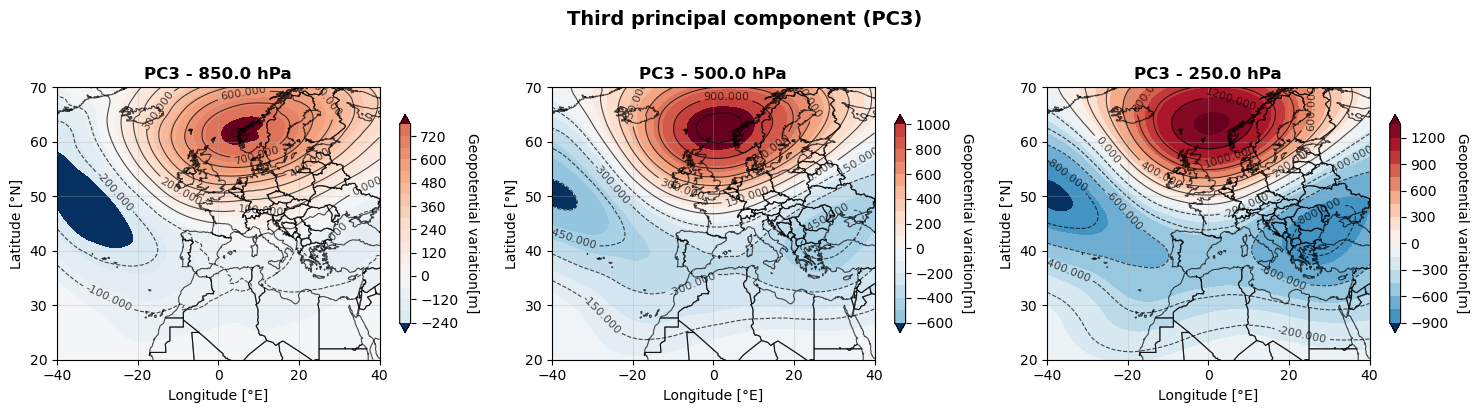

 PC3 statistics:
  850.0 hPa: range [-290.775468, 802.057849]
  500.0 hPa: range [-621.869381, 1098.793230]
  250.0 hPa: range [-937.468762, 1383.153515]

=== Fourth principal component (PC4) ===
Range physic pattern PC4: [-1137.6, 1421.3]m
Scala comune per PC4: [-1421, 1421]m


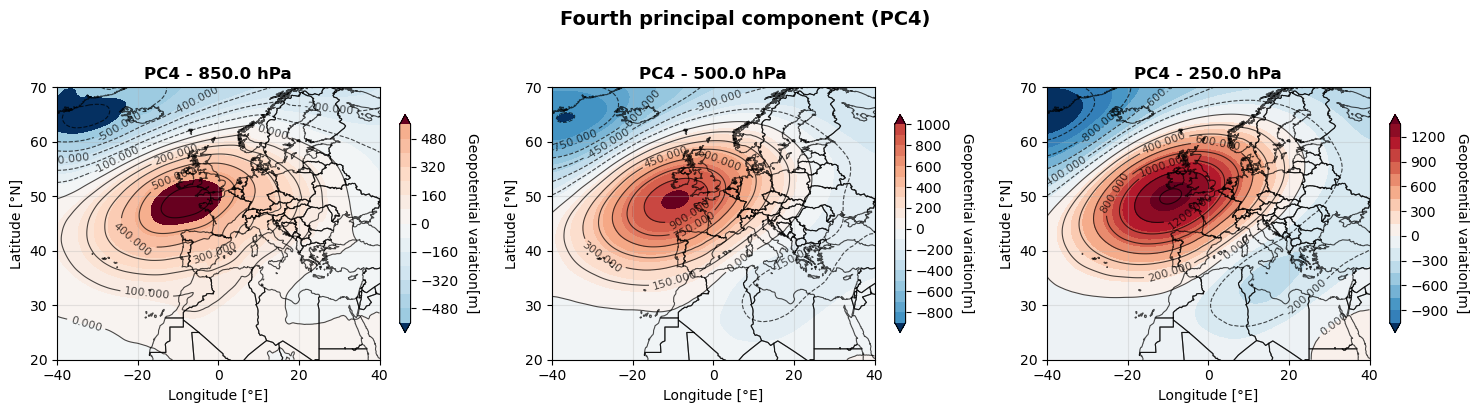

 PC4 statistics:
  850.0 hPa: range [-628.956120, 639.939619]
  500.0 hPa: range [-905.335080, 1020.801137]
  250.0 hPa: range [-1137.620465, 1421.305635]

=== Fifth principal component (PC5) ===
Range physic pattern PC5: [-883.4, 1069.9]m
Scala comune per PC5: [-1070, 1070]m


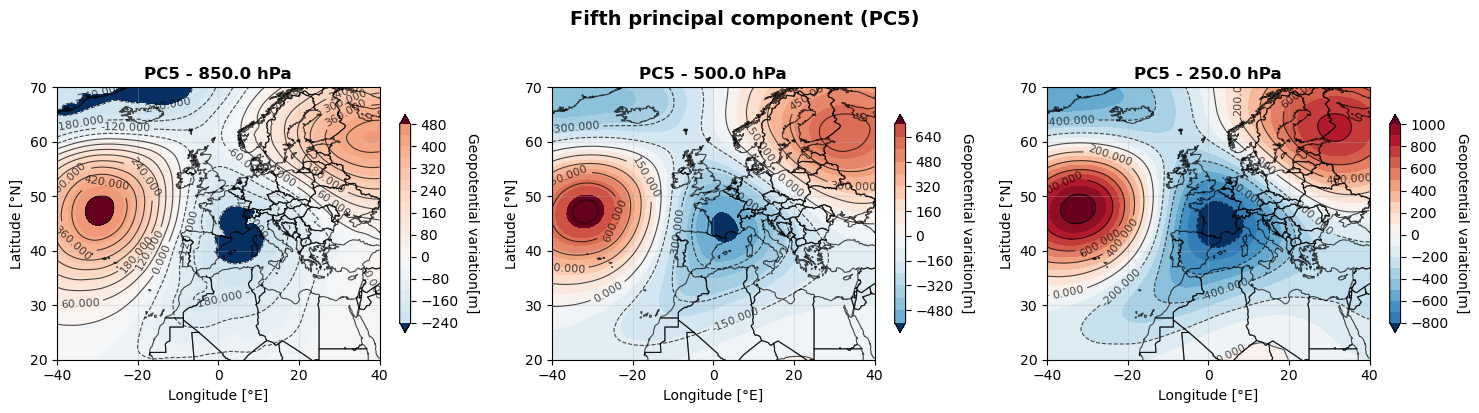

 PC5 statistics:
  850.0 hPa: range [-273.113958, 503.242093]
  500.0 hPa: range [-584.691888, 780.659183]
  250.0 hPa: range [-883.433786, 1069.942344]


In [ ]:
### vediamo se funziona
def visualization_pca_real_values(components_to_plot, pressure_levels, lats, lons, n_pressure, n_lat, n_lon, sf=None):
    """
    Visualizza i pattern base delle componenti principali (senza variazioni ±σ)
    """
    
    for pc_idx, (pc_coefficients, pc_name, pc_title) in enumerate(components_to_plot):
        
        print(f"\n=== {pc_title} ===")
        
        # Pattern base = solo i coefficienti della PC (normalizzati)
        # Opzione 1: Coefficienti puri (più interpretabile)
        # pattern_base = pc_coefficients

        # Real Pattern
        pc_std = np.sqrt(ipca.explained_variance_[pc_idx])
        physical_pattern = pc_coefficients * pc_std * global_std

        print(f"Range physic pattern {pc_name}: [{physical_pattern.min():.1f}, {physical_pattern.max():.1f}]m")

        # Reshape per la visualizzazione spaziale
        pattern_reshaped = physical_pattern.reshape(n_pressure, n_lat, n_lon)

        # Valori min/max su TUTTI i livelli di pressione
        global_min = pattern_reshaped.min()
        global_max = pattern_reshaped.max()
        vmax = max(abs(global_min), abs(global_max))
        vmin = -vmax
        print(f"Scala comune per {pc_name}: [{vmin:.0f}, {vmax:.0f}]m")
        
        # Plot semplificato: solo i pattern base
        fig, axes = plt.subplots(1, len(pressure_levels), figsize=(5*len(pressure_levels), 4))
        if len(pressure_levels) == 1:
            axes = [axes]
        
        for i, pressure in enumerate(pressure_levels):
            ax = axes[i]
            data = pattern_reshaped[i, :, :]
            
            lon_grid, lat_grid = np.meshgrid(lons, lats)

            #cmap = "RdBu_r"

            #if pressure >= 700:  # Bassa pressione (850 hPa) 
            #    pressure_label = "Bassa Pressione"
            #else:  # Alta pressione (500 hPa) 
            #    pressure_label = "Alta Pressione"


            # Contour lines
            contour_lines = ax.contour(lon_grid, lat_grid, data, 
                                      levels=12, linewidths=0.8, colors='black', alpha=0.7)
            
            # Contour filled (colori)
            contour_filled = ax.contourf(lon_grid, lat_grid, data, 
                                        levels=20, cmap="RdBu_r", vmin=vmin, vmax=vmax, extend='both')
            
            # Labels su contour lines
            ax.clabel(contour_lines, inline=True, fontsize=8, fmt='%.3f')
            
            # Confini europei
            if sf is not None:
                add_country_boundaries(ax, sf)
            
            ax.set_title(f'{pc_name} - {pressure} hPa', 
                        fontsize=12, fontweight='bold')
            ax.set_xlabel('Longitude [°E]')
            ax.set_ylabel('Latitude [°N]')
            ax.set_xlim([lons.min(), lons.max()])
            ax.set_ylim([lats.min(), lats.max()])
            ax.grid(True, alpha=0.3)
            
            cbar = plt.colorbar(contour_filled, ax=ax, shrink=0.8)
            cbar.set_label('Geopotential variation[m]', rotation=270, labelpad=15)
        
        # Title generale
        fig.suptitle(f'{pc_title}', 
                     fontsize=14, fontweight='bold', y=1.02)
        
        plt.tight_layout()
        plt.show()
        
        # Statistiche sui pattern
        print(f" {pc_name} statistics:")
        for i, pressure in enumerate(pressure_levels):
            pattern_level = pattern_reshaped[i, :, :]
            print(f"  {pressure} hPa: range [{pattern_level.min():.6f}, {pattern_level.max():.6f}]")

# Uso della nuova funzione
visualization_pca_real_values(components_to_plot, pressure_levels, lats, lons, 
                       n_pressure, n_lat, n_lon, sf=sf)

Mostra le vere variazioni fisiche in metri di geopotenziale  
Risultato del calcolo: coefficienti × deviazione_standard × scala_globale  
Rappresenta quanto cambia realmente il geopotenziale quando quella PC varia di ±1σ  
Mostra quanto si alzano/abbassano i livelli di pressione  
Rappresenta i pattern atmosferici reali che quella PC cattura   
- Variazioni reali: "quando PC1 aumenta di 1σ, il geopotenziale aumenta di X metri qui"
- Intensità meteorologica: quanto sono forti i cambiamenti di pressione  
_ _ _ - - _ _ _ 

**Prima Componente Principale (PC1)**  
Pattern identificato: GRADIENTE NORD-SUD EUROPEO

PC1 Positivo (MAX): Configurazione con alta pressione al sud e bassa al nord

Anticiclone prominente sull'Europa meridionale/Mediterraneo  
Depressione ciclonica sulla Scandinavia  
Forte gradiente barico nord-sud (differenza di 1214m a 850 hPa)  
PC1 Negativo (MIN): Configurazione opposta

Alta pressione estesa verso nord  
Pattern più omogeneo su tutta l'Europa  
Rappresenta condizioni più stabili e uniformi

**Seconda Componente Principale (PC2)**  
Pattern identificato: GRADIENTE OVEST-EST

PC2 Positivo (MAX): Alta pressione a ovest, bassa a est

Anticiclone atlantico che si estende verso l'Europa occidentale  
Valori di geopotenziale più bassi verso est  
Pattern tipico dell'influenza atlantica  
PC2 Negativo (MIN): Inversione del gradiente ovest-est

Configurazione con influenza continentale più marcata  
Differenze minori tra livelli (solo 345m a 500 hPa)  

**Terza Componente Principale (PC3)**  
Pattern identificato: PATTERN DIPOLARI COMPLESSI    

PC3 Positivo (MAX): Strutture dipolari ben definite

Alternanza di centri di alta e bassa pressione  
Pattern più localizzati e complessi  
PC3 Negativo (MIN): Configurazioni più zonali  

Pattern più estesi longitudinalmente  
Strutture meno localizzate  
🔍 OSSERVAZIONI CHIAVE  
Coerenza Verticale: I pattern sono coerenti attraverso tutti i livelli atmosferici (850, 500, 250 hPa),   indicando strutture barotropiche profonde

Intensità del Segnale: PC1 mostra le differenze più marcate (6353m a 250 hPa), confermando che è il modo dominante di variabilità

Significato Meteorologico:

PC1 rappresenta l'oscillazione principale dell'Europa tra configurazioni meridionali e settentrionali  
PC2 cattura l'influenza atlantica vs continentale  
PC3 descrive pattern più complessi e localizzati

__________

#### Hopkins Statistic - Clustering Tendency Assessment

The Hopkins statistic tests the clustering tendency of data. Values close to 0.5 indicate random data (no clustering), while values significantly different from 0.5 suggest clustering structure.

In [ ]:
def hopkins_statistic(X, n_samples=None):
    """
    Calculate Hopkins statistic for clustering tendency assessment.
    
    Parameters:
    X: data array (n_samples, n_features)
    n_samples: number of samples to use (default: 10% of data)
    
    Returns:
    Hopkins statistic (0-1 scale)
    """
    if n_samples is None:
        n_samples = min(int(0.1 * X.shape[0]), 500)  # Use 10% of data, max 500
    
    n_features = X.shape[1]
    
    # Get min/max for each feature to define the space bounds
    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)
    
    # Generate random points within the data space
    random_points = np.random.uniform(min_vals, max_vals, (n_samples, n_features))
    
    # Sample real data points
    indices = np.random.choice(X.shape[0], n_samples, replace=False)
    real_points = X[indices]
    
    # Fit nearest neighbors on the full dataset
    nn = NearestNeighbors(n_neighbors=2, metric='euclidean')
    nn.fit(X)
    
    # For random points: find distance to nearest real data point
    distances_random, _ = nn.kneighbors(random_points)
    u_distances = distances_random[:, 0]  # Distance to closest real point
    
    # For real points: find distance to nearest other real data point  
    distances_real, _ = nn.kneighbors(real_points)
    w_distances = distances_real[:, 1]  # Distance to second closest (skip self)
    
    # Calculate Hopkins statistic
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    hopkins_stat = u_sum / (u_sum + w_sum)
    
    return hopkins_stat

print("HOPKINS STATISTIC - CLUSTERING TENDENCY ASSESSMENT")

# Calculate Hopkins statistic for different subsets
sample_sizes = [100, 200, 500]
hopkins_results = []

for n_samp in sample_sizes:
    if n_samp <= X_pca.shape[0]:
        print(f"   • Computing Hopkins statistic with {n_samp} samples...")
        
        # Use first 10 components for efficiency
        X_hopkins = X_pca[:, :10]
        
        hopkins_val = hopkins_statistic(X_hopkins, n_samples=n_samp)
        hopkins_results.append((n_samp, hopkins_val))
        
        print(f"     → Hopkins statistic: {hopkins_val:.4f}")

# Display results
print(f"\n   • HOPKINS STATISTIC RESULTS:")
for n_samp, h_val in hopkins_results:
    print(f"   • {n_samp} samples: {h_val:.4f}")

# Average Hopkins value
if hopkins_results:
    mean_hopkins = np.mean([h for _, h in hopkins_results])
    print(f"   • Mean Hopkins statistic: {mean_hopkins:.4f}")
    
    print(f"\n   • INTERPRETATION:")
    if mean_hopkins < 0.3:
        print(f"   • STRONG clustering tendency (H < 0.3)")
        print(f"   • Data has clear cluster structure - excellent for clustering")
    elif mean_hopkins < 0.4:
        print(f"   • MODERATE clustering tendency (0.3 ≤ H < 0.4)")
        print(f"   • Data shows some cluster structure - good for clustering")
    elif mean_hopkins > 0.7:
        print(f"   • WEAK clustering tendency (H > 0.7)")
        print(f"   • Data may be too regular/uniform for meaningful clustering")
    else:
        print(f"   • RANDOM-like structure (0.4 ≤ H ≤ 0.7)")
        print(f"   • Data close to random distribution - clustering may not be meaningful")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sample_counts = [r[0] for r in hopkins_results]
    hopkins_values = [r[1] for r in hopkins_results]
    
    plt.bar(range(len(hopkins_results)), hopkins_values, 
            color='lightcoral', edgecolor='darkred', alpha=0.7)
    plt.axhline(y=0.5, color='gray', linestyle='-', alpha=0.8, label='H = 0.5 (Random)')
    plt.axhline(y=0.3, color='green', linestyle='--', alpha=0.8, label='H = 0.3 (Strong clustering)')
    plt.axhline(y=0.7, color='orange', linestyle='--', alpha=0.8, label='H = 0.7 (Weak clustering)')
    
    plt.xlabel('Sample Size')
    plt.ylabel('Hopkins Statistic')
    plt.title('Hopkins Statistic: Clustering Tendency Assessment')
    plt.xticks(range(len(hopkins_results)), [str(sc) for sc in sample_counts])
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for i, h_val in enumerate(hopkins_values):
        plt.text(i, h_val + 0.02, f'{h_val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

___________________________________________________

### 2.4 Correlation analysis

Matrice delle Correlazioni  
Heatmap delle correlazioni tra le prime 20 componenti principali  
Verifica dell'ortogonalità della PCA (le correlazioni dovrebbero essere ≈ 0)  
Statistiche di correlazione per validare la trasformazione PCA

CORRELATION ANALYSIS OF PCA COMPONENTS
   • Analyzing correlations for first 20 components
   • Correlation matrix shape: (20, 20)


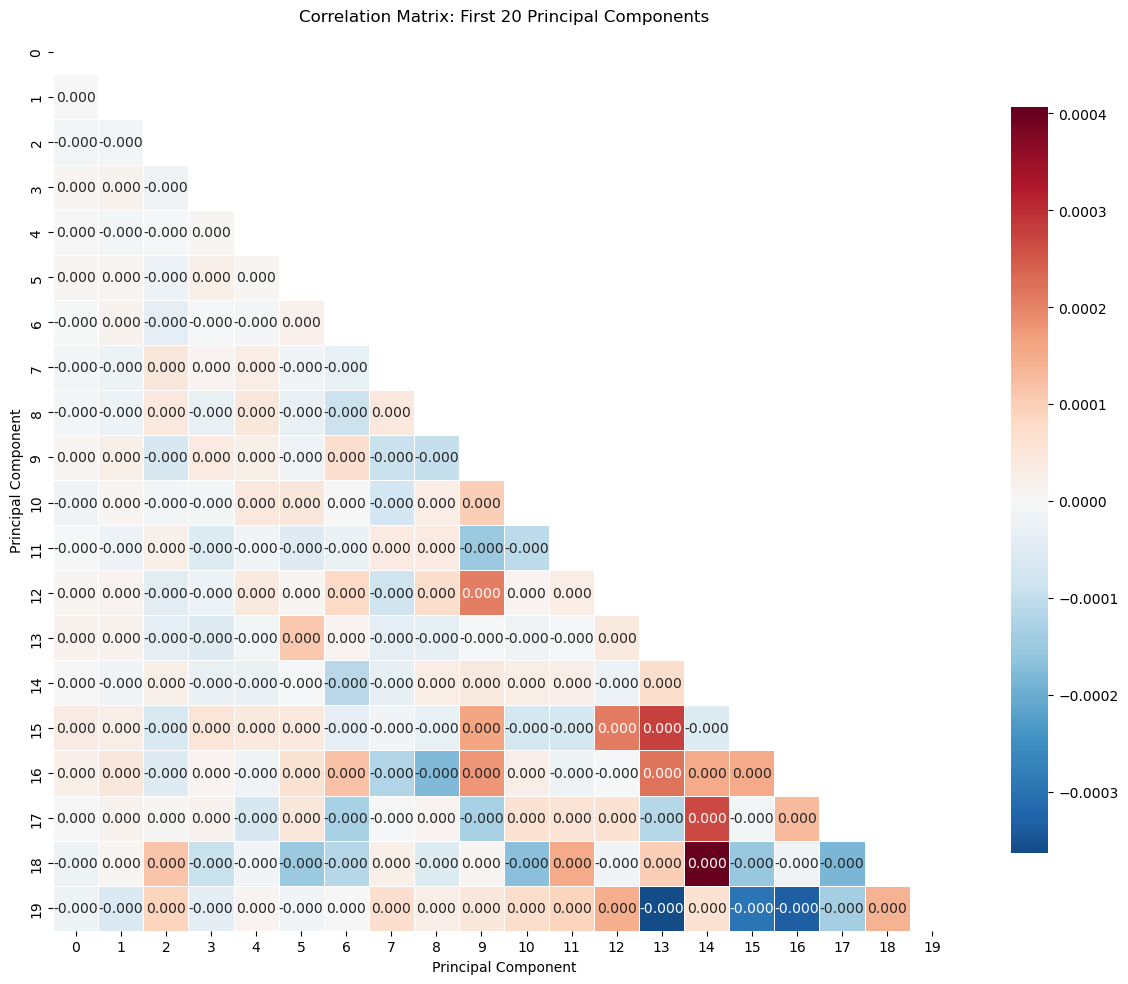


  CORRELATION STATISTICS:
   • Maximum absolute correlation (off-diagonal): 0.000406
   • Mean absolute correlation (off-diagonal): 0.000058
   • Expected for PCA: values should be close to 0 (orthogonal components)
   • PCA orthogonality confirmed: all correlations < 0.01


In [ ]:
print("CORRELATION ANALYSIS OF PCA COMPONENTS")

# Create correlation matrix for first 20 components (for visualization clarity)
n_comp_corr = min(20, X_pca.shape[1])
X_pca_subset = X_pca[:, :n_comp_corr]

# Calculate correlation matrix
correlation_matrix = np.corrcoef(X_pca_subset.T)

print(f"   • Analyzing correlations for first {n_comp_corr} components")
print(f"   • Correlation matrix shape: {correlation_matrix.shape}")

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title(f'Correlation Matrix: First {n_comp_corr} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Principal Component')
plt.tight_layout()
plt.show()

# Check for any significant correlations (should be close to 0 for PCA)
off_diagonal = correlation_matrix[~np.eye(correlation_matrix.shape[0], dtype=bool)]
max_correlation = np.abs(off_diagonal).max()
mean_abs_correlation = np.abs(off_diagonal).mean()

print(f"\n  CORRELATION STATISTICS:")
print(f"   • Maximum absolute correlation (off-diagonal): {max_correlation:.6f}")
print(f"   • Mean absolute correlation (off-diagonal): {mean_abs_correlation:.6f}")
print(f"   • Expected for PCA: values should be close to 0 (orthogonal components)")

if max_correlation > 0.01:
    print(f"   • WARNING: Some correlations > 0.01 detected")
else:
    print(f"   • PCA orthogonality confirmed: all correlations < 0.01")
    

____________________________

Funzione per selezionare i dati di z a 500 hPa e t a 850 hPa. carico i dati ' era5_2000_2004.grib'.
Da mettere al posto della cella con 'prepare matrix'. 

In [ ]:
# POI DA TOGLIERE e demarcare la cella di prima se torno ai dati di prima (cella per selezionare le variabili)
# nel caricamento dati devo mettere il file 'era5_2000_2004.grib'
# - Geopotenziale (z) a 500 hPa
# - Temperatura (t) a 850 hPa

# Crea un nuovo dataset con solo le variabili e livelli desiderati
ds_filtered = xr.Dataset()

# Aggiungi geopotenziale a 500 hPa
if 'z' in ds.data_vars:
    ds_filtered['z'] = ds['z'].sel(isobaricInhPa=[250, 500, 850])  # PER Z_500 + T_850 : isobaricInhPa =[500]
                                                                   # PER Z_250, 500, 850 + t_850 : isobaricInhPa = [250, 500, 850]

# Aggiungi temperatura a 850 hPa
if 't' in ds.data_vars:
    ds_filtered['t'] = ds['t'].sel(isobaricInhPa=850) 

# Copia le coordinate necessarie
ds_filtered = ds_filtered.assign_coords({
    'latitude': ds.latitude,
    'longitude': ds.longitude,
    'time': ds.time,
    'isobaricInhPa': [250, 500, 850]   # da commentare se voglio solo PER z_500 + t_850
})

print(f"Dataset filtrato - Variabili: {list(ds_filtered.data_vars.keys())}")
print(f"Dimensioni: {dict(ds_filtered.dims)}")

X, data_matrices = prepare_data_matrix(ds_filtered)

##################################### check 
# VERIFICA ALLINEAMENTO TEMPORALE TRA Z E T
test_indices = [0, 100, 500, -1]  

for idx in test_indices:
    # Data dal dataset originale
    original_date = pd.to_datetime(ds.time.values[idx])
    
    # Data dal dataset filtrato
    filtered_date = pd.to_datetime(ds_filtered.time.values[idx])
    
    # Valori originali per confronto
    z_original = ds['z'].isel(time=idx, isobaricInhPa=1).values[100, 150]  
    t_original = ds['t'].isel(time=idx, isobaricInhPa=0).values[100, 150]  
    
    # Valori nel dataset filtrato
    z_filtered = ds_filtered['z'].isel(time=idx).values[100, 150]
    t_filtered = ds_filtered['t'].isel(time=idx).values[100, 150]
    
    print(f"Giorno {idx}: {original_date.strftime('%Y-%m-%d')}")
    print(f"   Data originale == filtrata: {original_date == filtered_date}")
    print(f"   z originale == filtrato: {np.isclose(z_original, z_filtered)}")
    print(f"   t originale == filtrato: {np.isclose(t_original, t_filtered)}")

Dataset filtrato - Variabili: ['z', 't']
Dimensioni: {'time': 1827, 'isobaricInhPa': 3, 'latitude': 201, 'longitude': 321}
   • Processing z...
   • Processing t...
